In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('insurance claims')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [46]:
df.shape

(1000, 40)

In [62]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [47]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [48]:
#to select categorical features
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [49]:
#to select numerical features

numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN


In [50]:
# dropping _c39 as it is not required

df.drop('_c39',axis=1,inplace=True)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

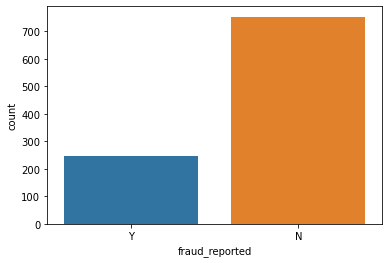

In [51]:

sn.countplot(df['fraud_reported'])


In [52]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [37]:
# target data is imbalanced will have to do over sampling

In [38]:
# policy bind date & incident date to be converted into seperate day,month and year

In [53]:
df['Date']=df['policy_bind_date'].str.split('-').str[0]

In [54]:
df['Month']=df['policy_bind_date'].str.split('-').str[1]

In [55]:
df['Year']=df['policy_bind_date'].str.split('-').str[2]

In [70]:
df['incidentdate']=df['incident_date'].str.split('-').str[0]

In [71]:
df['incidentmonth']=df['incident_date'].str.split('-').str[1]

In [72]:
df['incidentyear']=df['incident_date'].str.split('-').str[2]

In [42]:
# will be dropping now policy bind date and incident date

In [56]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [73]:
df.drop('incident_date',axis=1,inplace=True)

In [112]:
df.drop('Date',axis=1,inplace=True)

In [113]:
df.drop('Month',axis=1,inplace=True)

In [114]:
df.drop('Year',axis=1,inplace=True)

In [115]:
df.drop('incidentdate',axis=1,inplace=True)

In [116]:
df.drop('incidentmonth',axis=1,inplace=True)

In [117]:
df.drop('incidentyear',axis=1,inplace=True)

In [57]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [58]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [59]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [60]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [61]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [64]:
# converting categeorical features to numeric 

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['policy_state']=LE.fit_transform(df['policy_state'])
df['policy_csl']=LE.fit_transform(df['policy_csl'])
df['insured_sex']=LE.fit_transform(df['insured_sex'])
df['insured_education_level']=LE.fit_transform(df['insured_education_level'])
df['insured_occupation']=LE.fit_transform(df['insured_occupation'])
df['insured_hobbies']=LE.fit_transform(df['insured_hobbies'])
df['insured_relationship']=LE.fit_transform(df['insured_relationship'])
df['incident_type']=LE.fit_transform(df['incident_type'])
df['collision_type']=LE.fit_transform(df['collision_type'])
df['incident_severity']=LE.fit_transform(df['incident_severity'])
df['authorities_contacted']=LE.fit_transform(df['authorities_contacted'])
df['incident_state']=LE.fit_transform(df['incident_location'])
df['incident_city']=LE.fit_transform(df['incident_city'])
df['incident_location']=LE.fit_transform(df['incident_location'])
df['property_damage']=LE.fit_transform(df['property_damage'])
df['police_report_available']=LE.fit_transform(df['police_report_available'])
df['auto_make']=LE.fit_transform(df['auto_make'])
df['auto_model']=LE.fit_transform(df['auto_model'])
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])


In [118]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0


In [119]:
df.shape

(1000, 37)

In [120]:
cor=df.corr()

In [121]:
cor

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


<AxesSubplot:>

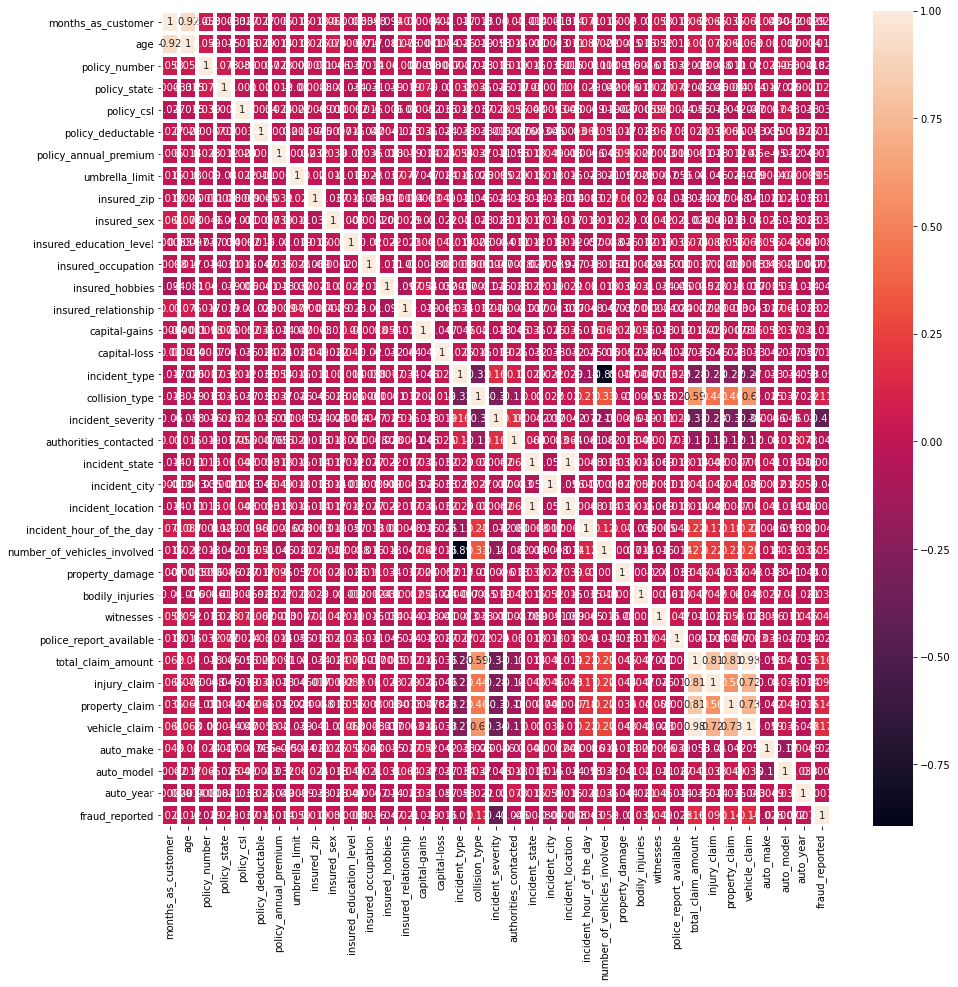

In [122]:
plt.figure(figsize=(15,15))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='white')

In [88]:
# plotting features against target variable

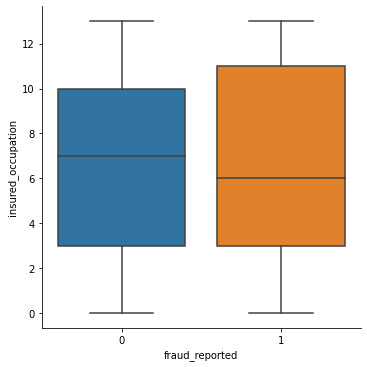

In [90]:
sn.factorplot(data=df,y='insured_occupation',x='fraud_reported',size=5,kind='box')

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

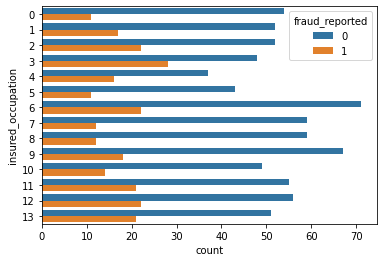

In [100]:
sn.countplot(y='insured_occupation',hue='fraud_reported',data=df,)

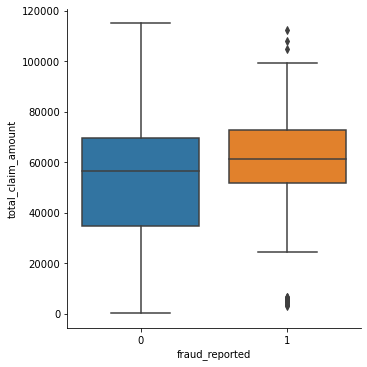

In [92]:
sn.factorplot(data=df,y='total_claim_amount',x='fraud_reported',size=5,kind='box')

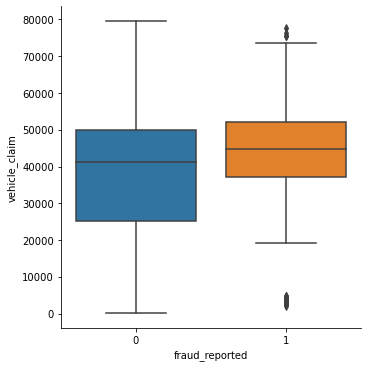

In [93]:
sn.factorplot(data=df,y='vehicle_claim',x='fraud_reported',size=5,kind='box')

In [123]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                 0.000000
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


months_as_customer                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
age                            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
policy_number                  AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
policy_state                   AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
policy_csl                     AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
policy_deductable              AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
policy_annual_premium          AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
umbrella_limit                 AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
insured_zip                       AxesSubplot(0.125,0.593621;0.0824468x0.130172)
insured_sex                    AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
insured_education_level        AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
insured_occupation             AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
insured_hobbies             

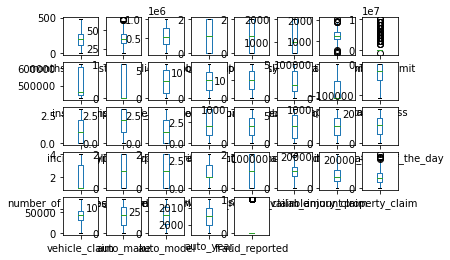

In [124]:
df.plot(kind='box',subplots=True,layout=(5,8))

In [125]:
collist=df.columns.values
ncol=15
nrows=10

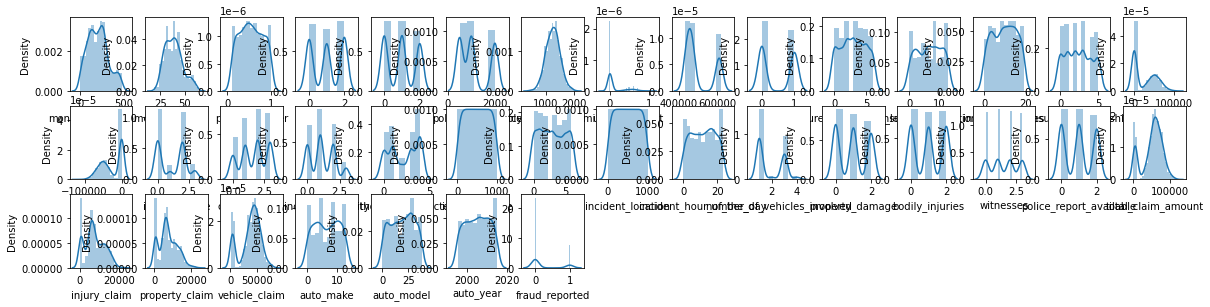

In [126]:
# plotting dist plot to check data distribution 
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

In [127]:
df1=pd.get_dummies(df,prefix=['police_report_available','property_damage'],columns=['police_report_available','property_damage'])

In [128]:
df1.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,police_report_available_0,police_report_available_1,police_report_available_2,property_damage_0,property_damage_1,property_damage_2
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,10,1,2004,1,0,0,1,0,0,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,8,12,2007,1,1,0,0,1,0,0
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,4,30,2007,0,0,1,0,0,1,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,3,34,2014,1,0,1,0,1,0,0
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,31,2009,0,0,1,0,0,1,0


In [129]:
# to correct nan,infinity values

df=df1[~df1.isin([np.nan,np.inf,-np.inf]).any(1)]

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_csl                   1000 non-null   int64  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int64  
 11  insured_occupation           1000 non-null   int64  
 12  insured_hobbies              1000 non-null   int64  
 13  insured_relationshi

In [131]:
# Outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [132]:
df.shape,new_df.shape

((1000, 41), (980, 41))

In [133]:
# data standardization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,recall_score
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('fraud_reported',axis=1))
x=scaled_df
y=df['fraud_reported']

In [134]:
x

array([[ 1.07813958,  0.99083647, -0.09595307, ..., -0.75      ,
        -0.71454462,  1.5202823 ],
       [ 0.2089946 ,  0.33407345, -0.79152739, ...,  1.33333333,
        -0.71454462, -0.65777257],
       [-0.60800168, -1.08891308,  0.55056594, ..., -0.75      ,
         1.39949272, -0.65777257],
       ...,
       [-0.64276748, -0.54161057,  1.44891961, ...,  1.33333333,
        -0.71454462, -0.65777257],
       [ 2.20802805,  2.52328351, -0.04786687, ...,  1.33333333,
        -0.71454462, -0.65777257],
       [ 2.19064515,  2.3043625 ,  0.03830297, ...,  1.33333333,
        -0.71454462, -0.65777257]])

In [135]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [136]:
# using SMOTE for over sampling

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
x1,y1=sm.fit_resample(x,y)

In [137]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [139]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=30)

In [140]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x1_train,y1_train)
    pred=mod.predict(x1_test)
    acc=accuracy_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.8694690265486725 on random_state 23


In [141]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=23)

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [143]:
DTC=DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred=DTC.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.8628318584070797


In [144]:
RFC=RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred=RFC.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.8982300884955752


In [145]:
sv=SVC()
sv.fit(x1_train,y1_train)
pred=sv.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.8606194690265486


In [146]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

In [147]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.8413522254735868


In [148]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.8825504389342369


In [149]:
print(cross_val_score(sv,x1,y1,cv=5).mean())

0.8652328881652769


In [150]:
#SVC parameters hyper tuning
from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,10,100,500],
           'kernel':['poly','rbf','sigmoid']
           }

In [151]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x1_train,y1_train)
GCV_SVC.best_params_

{'C': 10, 'kernel': 'rbf'}

In [152]:
SVC_mod=SVC(C=10,kernel='rbf')
SVC_mod.fit(x1_train,y1_train)
pred=SVC_mod.predict(x1_test)
print(accuracy_score(y1_test,pred)*100)

88.05309734513274


In [153]:
#RandomForestClassifier hyper tuning

parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [154]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x1_train,y1_train)
GCV_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [156]:
RF_mod=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=100)
RF_mod.fit(x1_train,y1_train)
pred=RF_mod.predict(x1_test)
print(accuracy_score(y1_test,pred)*100)

89.15929203539822


In [157]:
# saving the model

import joblib
joblib.dump(RF_mod,"insuranceclaimprediction.pkl")

['insuranceclaimprediction.pkl']

# Conclusion-Random Forest is the model with accuracy of 89%